# Perceptron 
All the codes are executed with tensorflow 2.7.

## Dataset

In [1]:
##########################
### DATASET
##########################

import numpy as np

data = np.genfromtxt('data/perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

In [2]:
print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [3]:
# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

In [4]:
# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

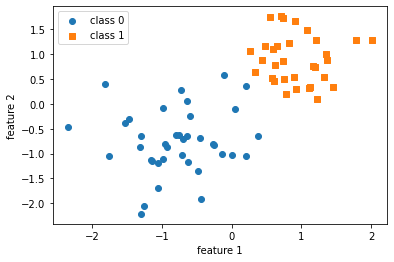

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## Concept of Graph and Session

In [7]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

# Architecture
n_features = X.shape[1]   # there are two features in toy dataset

##########################
### GRAPH DEFINITION
##########################

g = tf.Graph()
with g.as_default():
   
    # Graph Inputs
    features = tf.placeholder(dtype=tf.float32, 
                              shape=[None, n_features], name='features')
    targets = tf.placeholder(dtype=tf.float32, 
                             shape=[None, 1], name='targets')

    # Model Parameters
    weights = tf.Variable(tf.zeros(shape=[n_features, 1], 
                          dtype=tf.float32), name='weights')
    bias = tf.Variable([[0.]], dtype=tf.float32, name='bias')
    

    
    # Forward Pass
    linear = tf.add(tf.matmul(features, weights), bias, name='linear')
    ones = tf.ones(shape=tf.shape(linear)) 
    zeros = tf.zeros(shape=tf.shape(linear))
    prediction = tf.where(condition=tf.less(linear, 0.),
                          x=zeros, 
                          y=ones, 
                          name='prediction')
    
    # Backward Pass
    errors = targets - prediction
    weight_update = tf.assign_add(weights, 
                                  tf.reshape(errors * features, (n_features, 1)),
                                  name='weight_update')
    bias_update = tf.assign_add(bias, errors,
                                name='bias_update')
    
    train = tf.group(weight_update, bias_update, name='train')
    
    saver = tf.train.Saver(name='saver')


Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
##########################
### TRAINING & EVALUATION
##########################

with tf.Session(graph=g) as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(5):
        for example, target in zip(X_train, y_train):
            feed_dict = {'features:0': example.reshape(-1, n_features),
                         'targets:0': target.reshape(-1, 1)}
            _ = sess.run(['train'], feed_dict=feed_dict)


    w, b = sess.run(['weights:0', 'bias:0'])    
    print('Model parameters:\n')
    print('Weights:\n', w)
    print('Bias:', b)

    saver.save(sess, save_path='perceptron')
    
    pred = sess.run('prediction:0', feed_dict={features: X_train})
    errors = np.sum(pred.reshape(-1) != y_train)
    print('\nNumber of training errors:', errors)

2021-11-12 08:32:33.378883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 08:32:33.406548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 08:32:33.406877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 08:32:33.407684: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model parameters:

Weights:
 [[2.0293188]
 [0.5932976]]
Bias: [[-1.]]

Number of training errors: 0


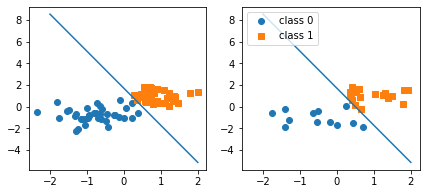

In [9]:
##########################
### 2D Decision Boundary
##########################

x_min = -2
y_min = ( -(w[0] * x_min) / w[1]
          -(b[0] / w[1]) )

x_max = 2
y_max = ( -(w[0] * x_max) / w[1]
          -(b[0] / w[1]) )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

## Load and prepare the dataset
You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(x_train.shape)
print(x_test.shape)

## Build a model
Build a tf.keras.Sequential model by stacking layers.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

The model returns a vector of logits or log-odds scores, one for each class.

In [ ]:
x_train[:1].shape

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

The tf.nn.softmax function converts these logits to probabilities for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [ ]:
model.fit(x_train, y_train, epochs=5)

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

In [ ]:
import tensorflow as tf

In [ ]:
##########################
### SETTINGS
##########################
# Architecture
n_features = X.shape[1]
print(n_features)

In [ ]:

#from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
##########################
### SETTINGS
##########################

# Architecture
n_features = X.shape[1]
print("No. of features ",n_features)